
<h1>Задание 1</h1>

есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   
Необходимо прочитать его и представить в виде df 

In [3]:
import pandas as pd
df = pd.read_csv('shopping_trends_updated.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.head(20)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


<h1>Задание 2.1</h1>

На основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покапают в основном осенью")

In [90]:
#гипотеза 1: 
df['Frequency of Purchases'].unique ()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

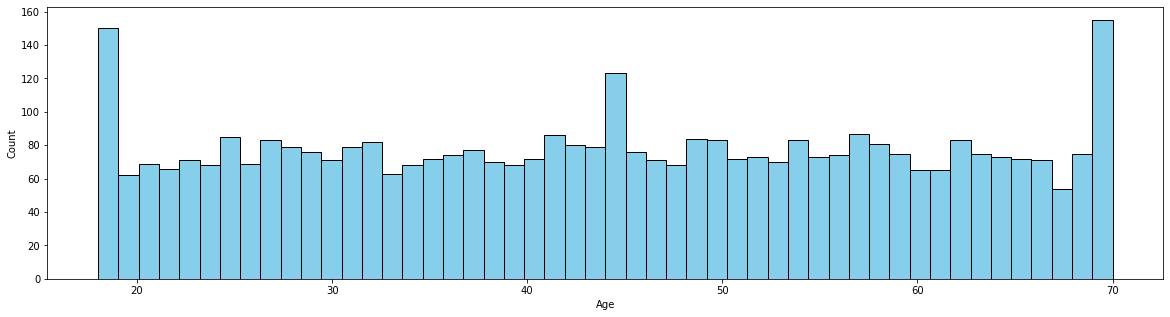

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 50, edgecolor = 'black', color = 'skyblue')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

In [23]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


In [27]:
print(len(df[df['Season']=='Spring']), len(df[df['Season']=='Fall']), len(df[df['Season']=='Winter']), len(df[df['Season']=='Summer']))

999 975 971 955


In [34]:
#гипотеза - женщины чаще покупают аксессуары, чем мужчины - неверная
print(len(df[(df['Gender']=='Male') &(df['Category']=='Accessories')])/len(df[df['Gender']=='Male']))
print(len(df[(df['Gender']=='Female') &(df['Category']=='Accessories')])/len(df[df['Gender']=='Female']))

0.31975867269984914
0.3141025641025641


<Figure size 1440x432 with 0 Axes>

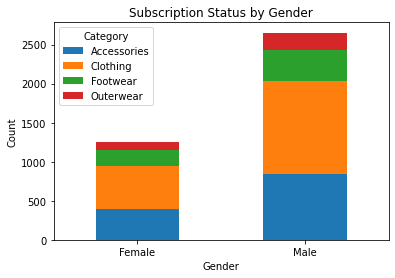

In [40]:
subscription_gender_counts = df.groupby(['Gender', 'Category']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

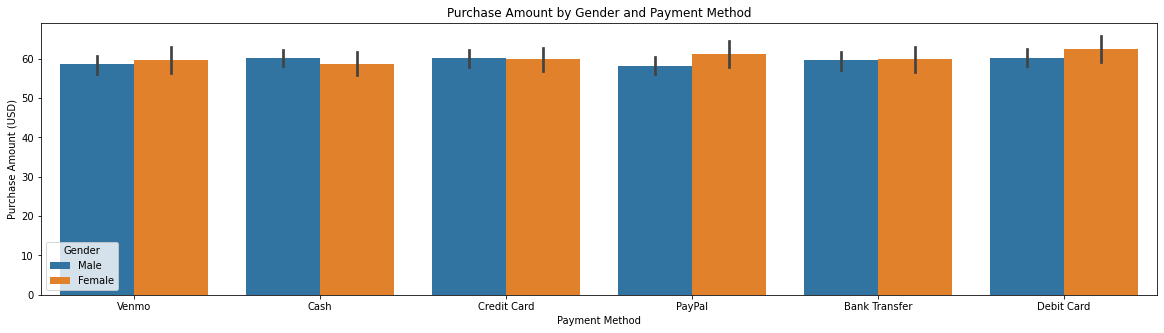

In [100]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Payment Method', y='Purchase Amount (USD)', hue='Gender', data=df)
plt.title('Purchase Amount by Gender and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

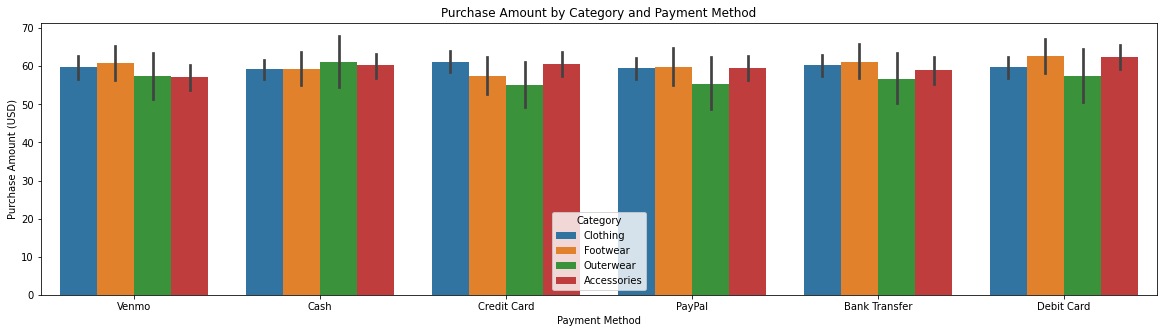

In [102]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Payment Method', y='Purchase Amount (USD)', hue='Category', data=df)
plt.title('Purchase Amount by Category and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

In [55]:
#гипотеза: те, кто применяли промокод, тратили больше денег - неверно
print(len(df[df['Promo Code Used']=='Yes']))
print(len(df[df['Promo Code Used']=='No']))
average_sum_yes = df[df['Promo Code Used'] == 'Yes']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount (USD) у тех у кого Promo Code Used:", average_sum_yes)
average_sum_yes = df[df['Promo Code Used'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount (USD) у тех у кого no Promo Code Used:", average_sum_yes)

1677
2223
Average Purchase Amount (USD) у тех у кого Promo Code Used: 59.27906976744186
Average Purchase Amount (USD) у тех у кого no Promo Code Used: 60.130454340980656


<AxesSubplot:xlabel='Category', ylabel='count'>

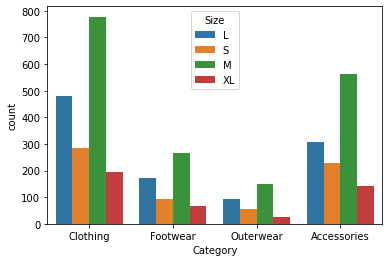

In [52]:
#гипотеза: M - самый популярный размер - верно
sns.countplot(x='Category', hue='Size', data=df)

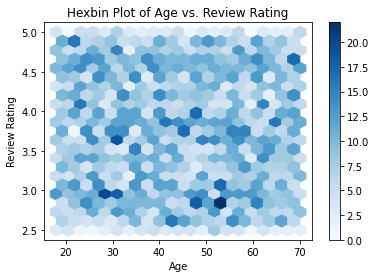

In [103]:
plt.hexbin(df['Age'], df['Review Rating'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.colorbar()
plt.show()

In [64]:
#гипотеза: чем выше рейтинг, тем больше денег потрачено - для мужчин корреляция выше, чем для женщин
df.groupby('Gender')[['Purchase Amount (USD)','Review Rating']]. corr().unstack().iloc [:, 1 ]

Gender
Female    0.003213
Male      0.043821
Name: (Purchase Amount (USD), Review Rating), dtype: float64

In [104]:
#гипотеза: средняя стоимость покупки выше у людей с подпиской - -неверная
avg_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("С подпиской:", avg_yes)
print("Без подписки:", avg_no)

С подпиской: 59.49192782526116
Без подписки: 59.865121180189675


<h1>Задание 2.2</h1>

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды. 

In [68]:
most_common_item = df['Item Purchased'].mode()[0]
print(most_common_item)

Blouse


In [70]:
#по факту получается, что не только блузка, но и украшения и брюки
df["Item Purchased"].value_counts()


Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

In [71]:
print('Самый популярный товар: Blouse, Jewelry, Pants')

Самый популярный товар: Blouse, Jewelry, Pants


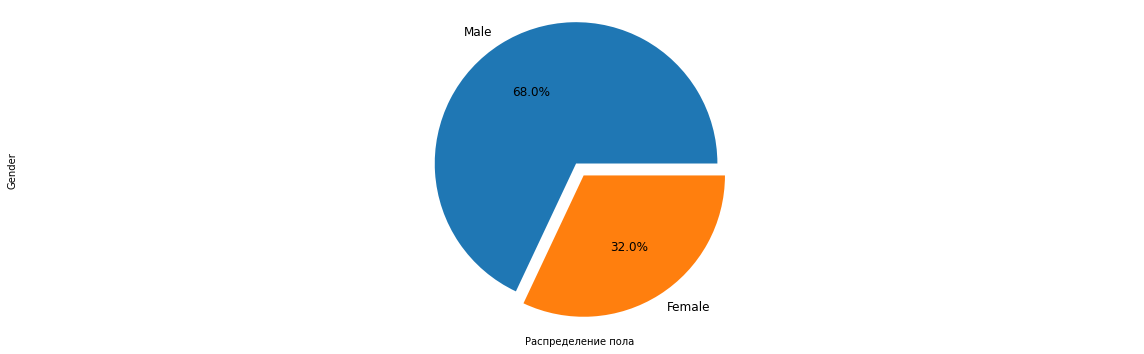

In [79]:
#распределение покупателей по полу
plt.figure(figsize = (20, 6))

counts = df['Gender'].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Распределение пола')
plt.axis('equal')
plt.show()

In [81]:
df["Gender"].value_counts()

Male      2652
Female    1248
Name: Gender, dtype: int64

In [85]:
#больше покупают мужчины - общее количество покупок пола делю на количество людей
print(df.loc[df['Gender'] == 'Male', 'Previous Purchases'].sum()/len(df[df['Gender']=='Male']))
print(df.loc[df['Gender'] == 'Female', 'Previous Purchases'].sum()/len(df[df['Gender']=='Female']))

25.707013574660632
24.596153846153847


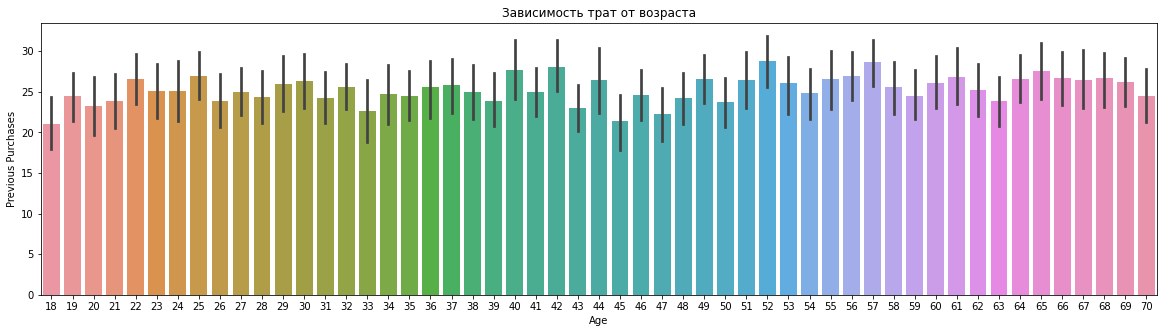

In [89]:
#больше всего покупок - у людей в возрасте 52, 57
plt.figure(figsize=(20, 5))
sns.barplot(x='Age', y='Previous Purchases', data=df)
plt.title('Зависимость трат от возраста')
plt.xlabel('Age')
plt.ylabel('Previous Purchases')
plt.show()

In [95]:
#женщины покупают чаще
print(len(df[(df['Gender']=='Male') &(df['Frequency of Purchases']=='Bi-Weekly')])/len(df[df['Gender']=='Male']))
print(len(df[(df['Gender']=='Female') &(df['Frequency of Purchases']=='Bi-Weekly')])/len(df[df['Gender']=='Female']))

0.13536953242835595
0.15064102564102563


<h1>Задание 3</h1> 

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

In [108]:
df = pd.read_csv('drinks.csv')


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [115]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [120]:
max_beer = df[df['beer_servings']==df['beer_servings'].max()]
max_spirit = df[df['spirit_servings']==df['spirit_servings'].max()]
max_wine = df[df['wine_servings']==df['wine_servings'].max()]
max_total = df[df['total_litres_of_pure_alcohol']==df['total_litres_of_pure_alcohol'].max()]

print('Max beer:', max_beer['country'])
print('Max wine:', max_wine['country'])
print('Max spirit:', max_spirit['country'])
print('Max total:', max_total['country'])

Max beer: 117    Namibia
Name: country, dtype: object
Max wine: 61    France
Name: country, dtype: object
Max spirit: 68    Grenada
Name: country, dtype: object
Max total: 15    Belarus
Name: country, dtype: object


<h1>Задание 4</h1> 

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [123]:
df = pd.read_csv('tarantino.csv')

In [124]:
df.head(5)

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [127]:
print('число проклятий:', len(df[df['type']=='word']))
print('число смертей:', len(df[df['type']=='death']))

число проклятий: 1704
число смертей: 190


In [130]:
df['movie'].unique()

array(['Reservoir Dogs', 'Pulp Fiction', 'Kill Bill: Vol. 1',
       'Kill Bill: Vol. 2', 'Inglorious Basterds', 'Django Unchained',
       'Jackie Brown'], dtype=object)

In [131]:
print('проклятия/смерти в фильме Reservoir Dogs:', len(df[(df['movie']=='Reservoir Dogs') &(df['type']=='word')])/len(df[(df['movie']=='Reservoir Dogs') &(df['type']=='death')]))

print('проклятия/смерти в фильме Pulp Fiction:', len(df[(df['movie']=='Pulp Fiction') &(df['type']=='word')])/len(df[(df['movie']=='Pulp Fiction') &(df['type']=='death')]))

print('проклятия/смерти в фильме Kill Bill: Vol. 1:', len(df[(df['movie']=='Kill Bill: Vol. 1') &(df['type']=='word')])/len(df[(df['movie']=='Kill Bill: Vol. 1') &(df['type']=='death')]))

print('проклятия/смерти в фильме Kill Bill: Vol. 2:', len(df[(df['movie']=='Kill Bill: Vol. 2') &(df['type']=='word')])/len(df[(df['movie']=='Kill Bill: Vol. 2') &(df['type']=='death')]))

print('проклятия/смерти в фильме Inglorious Basterds:', len(df[(df['movie']=='Inglorious Basterds') &(df['type']=='word')])/len(df[(df['movie']=='Inglorious Basterds') &(df['type']=='death')]))

print('проклятия/смерти в фильме Django Unchained:', len(df[(df['movie']=='Django Unchained') &(df['type']=='word')])/len(df[(df['movie']=='Django Unchained') &(df['type']=='death')]))

print('проклятия/смерти в фильме Jackie Brown:', len(df[(df['movie']=='Jackie Brown') &(df['type']=='word')])/len(df[(df['movie']=='Jackie Brown') &(df['type']=='death')]))

проклятия/смерти в фильме Reservoir Dogs: 42.1
проклятия/смерти в фильме Pulp Fiction: 67.0
проклятия/смерти в фильме Kill Bill: Vol. 1: 0.9047619047619048
проклятия/смерти в фильме Kill Bill: Vol. 2: 6.2727272727272725
проклятия/смерти в фильме Inglorious Basterds: 1.2083333333333333
проклятия/смерти в фильме Django Unchained: 5.574468085106383
проклятия/смерти в фильме Jackie Brown: 92.0


In [132]:
#частота употребления проклятий
df['word'].value_counts()

fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
bullshit          15
motherfuckers     15
dick              14
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards     

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


(array([64., 55., 82., 69., 84., 51., 65., 62., 36., 64., 57., 39., 49.,
        30., 42., 59., 51., 53., 31., 42., 63., 32., 28., 30., 32., 59.,
        68., 49., 40., 53., 40., 59., 24., 17.,  2., 23.]),
 array([  0.4       ,   4.84111111,   9.28222222,  13.72333333,
         18.16444444,  22.60555556,  27.04666667,  31.48777778,
         35.92888889,  40.37      ,  44.81111111,  49.25222222,
         53.69333333,  58.13444444,  62.57555556,  67.01666667,
         71.45777778,  75.89888889,  80.34      ,  84.78111111,
         89.22222222,  93.66333333,  98.10444444, 102.54555556,
        106.98666667, 111.42777778, 115.86888889, 120.31      ,
        124.75111111, 129.19222222, 133.63333333, 138.07444444,
        142.51555556, 146.95666667, 151.39777778, 155.83888889,
        160.28      ]),
 <BarContainer object of 36 artists>)

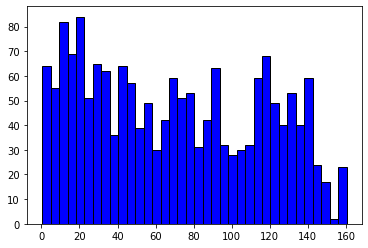

In [139]:
time=[]
for i in range (1893):
    if df.loc[i]['type'] == 'word':
        time.append(df.loc[i]['minutes_in'])

        
import matplotlib.pyplot as plt

plt.hist(time, color = 'blue', edgecolor = 'black',
         bins = int(180/5))